<a href="https://colab.research.google.com/github/Rohit9403/Audio-Pre-processing/blob/master/Audio_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependencies

In [0]:
import librosa , librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [0]:
file="/content/drive/My Drive/Colab Data/Two_Feet_-_Go_Fuck_Yourself (online-audio-converter.com).wav"

# Waveform


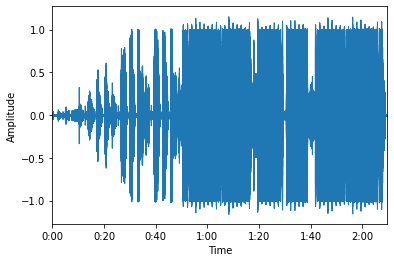

In [3]:
#waveform
signal, sr=librosa.load(file, sr=22050)#sr*T>22050*30
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# FFT spectrum

Text(0.5, 1.0, 'Power spectrum')

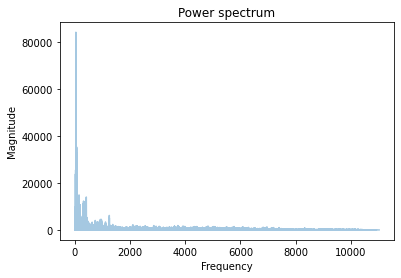

In [4]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sr, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
#plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

#Short time FFT

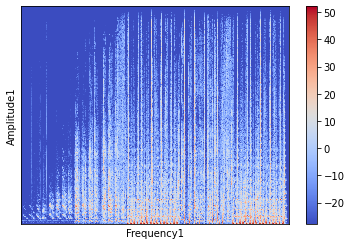

In [5]:
#no of samples per fft
n_fft=2048
hop_length=512# amount we are shifting towards right in frame

stft=librosa.core.stft(signal,hop_length=hop_length,n_fft=n_fft)

spectrogram=np.abs(stft)

#Amplitude to db by taking log
log_spectrogram=librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Frequency1")
plt.ylabel("Amplitude1")
plt.colorbar()
plt.show()

#MFCC

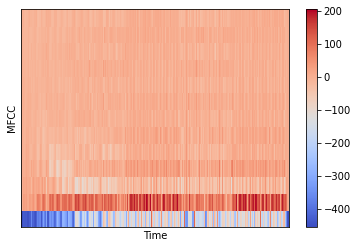

In [6]:
MFCC=librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCC, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()



In [7]:
MFCC.shape

(13, 5588)

Add new axis in order to feed it into the predict method for CNN


In [0]:
MFCC = MFCC[..., np.newaxis]


In [9]:
MFCC.shape

(13, 5588, 1)